In [5]:
%matplotlib inline
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm

read_path = '/home/mckc/label1//'
os.chdir(read_path)
os.getcwd()

'/home/mckc/label1'

In [6]:
import cv2
from cv2 import resize
from skimage import exposure
from skimage import exposure
from skimage.morphology import disk
from skimage.filters import rank
selem = disk(30)

files = os.listdir(read_path)
map = np.load('/home/mckc/map.npy')

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,AveragePooling2D
from keras.layers import Convolution2D, MaxPooling2D,BatchNormalization
from keras.utils import np_utils
from keras.optimizers import Adam,SGD,Adadelta,Adagrad
from keras import backend as K

#Y_Keras = np_utils.to_categorical(Y_number, 97)
#Y_Keras_test = np_utils.to_categorical(Y_test_number,97)

model = Sequential()
model.add(Convolution2D(32, 3, 3,border_mode='same',input_shape=(1, 96, 96)))
convout1 = Activation('relu')
model.add(convout1)
model.add(Convolution2D(64, 3, 3,border_mode='same'))
convout2 = Activation('relu')
model.add(convout2)
#model.add(BatchNormalization(epsilon=1e-05,axis=1,momentum=0.99))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(64, 3, 3,border_mode='same'))
convout3 = Activation('relu')
model.add(convout3)
model.add(Convolution2D(128, 3, 3,border_mode='same'))
convout4 = Activation('relu')
model.add(convout4)
#model.add(BatchNormalization(epsilon=1e-05,axis=1,momentum=0.99))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(96, 3, 3,border_mode='same'))
convout5 = Activation('relu')
model.add(convout5)
model.add(Convolution2D(192, 3, 3,border_mode='same'))
convout6 = Activation('relu')
model.add(convout6)
#model.add(BatchNormalization(epsilon=1e-05,axis=1,momentum=0.99))
model.add(MaxPooling2D((2,2), strides=(2,2)))

#model.add(Convolution2D(128, 3, 3,border_mode='same'))
#convout7 = Activation('relu')
#model.add(convout7)
#model.add(Convolution2D(256, 3, 3,border_mode='same'))
#convout8 = Activation('relu')
#model.add(convout8)
#model.add(MaxPooling2D((2,2), strides=(2,2)))

#model.add(Convolution2D(160, 3, 3,border_mode='same'))
#convout9 = Activation('relu')
#model.add(convout9)
#model.add(Convolution2D(320, 3, 3,border_mode='same'))
#convout10 = Activation('relu')
#model.add(convout10)
#model.add(AveragePooling2D(pool_size=(2, 2), strides=(1,1)))

model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(1000,activation='relu'))
model.add(Dense(97,activation='softmax'))

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.load_weights('/home/mckc/Face_code/model_2.h5')
#model.load_weights("deep_model_1.h5")
#model_1 best with loss 0.6

In [8]:
for i in range(len(files)):
    image = resize(cv2.imread(files[i],0),(96,96))
    image_g_eq = exposure.equalize_hist(image)
    name = map[model.predict_classes(image_g_eq.reshape(-1,1,96,96),verbose=0)][0]
    os.rename(files[i],str(name)+'_'+str(i)+'.jpg')

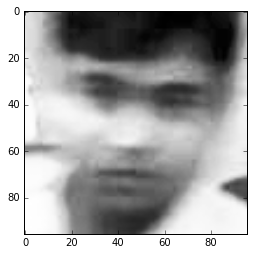

In [23]:
plt.imshow(image_g_eq,cmap=cm.Greys_r)